# Eindimensionale Faltung

Wir definieren die Faltung eindimensionaler Vektoren exakt wie in der Vorlesung.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def conv1d(y,z):
    N=len(y)
    M=len(z)
    erg=np.zeros(N+M-1)
    for k in range(0,N+M-1):
        sum=0
        for j in range (0,N-1):
            if ((k-j>=0) & (k-j<M)):
                sum=sum+y[j]*z[k-j]
        erg[k]=sum
    return erg

Wir betrachten als Beispiel die Faltung der Rechteckfunktion mit (0.5,0.5) und (0.5,-0.5).

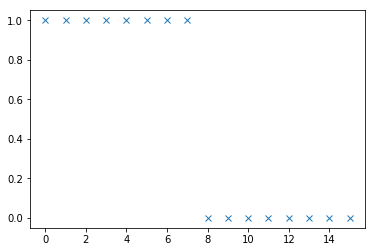

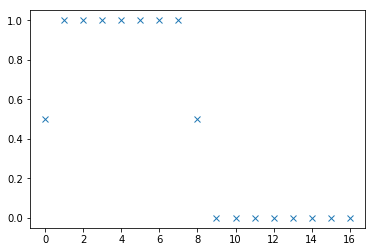

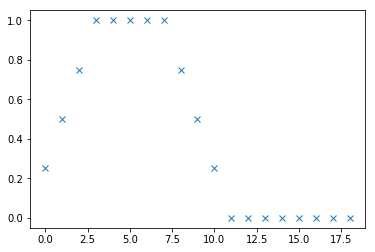

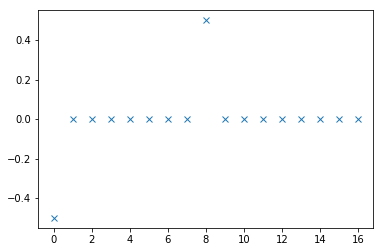

In [3]:
N=16
x=np.zeros(N)
x[0:int(N/2)]=1
y1=np.array([0.5,0.5])
y2=np.array([-0.5,0.5])
y3=np.array([0.25,0.25,0.25,0.25])
z1=conv1d(x,y1)
z2=conv1d(x,y2)
z3=conv1d(x,y3)
plt.plot(x,'x')
plt.figure()
plt.plot(z1,'x')
plt.figure()
plt.plot(z3,'x')
plt.figure()
plt.plot(z2,'x')

Das eine ist ein Glätter, das andere ist ein Kantendetektor.

# Eindimensionale Faltung auf den Spalten eines Bildes

Wir laden zunächst ein Testbild.

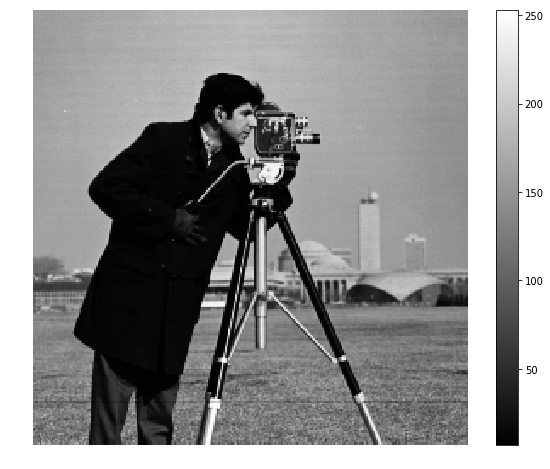

In [4]:
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
from PIL import Image
import requests
from io import BytesIO
url="https://github.com/antimatter15/cameraman/raw/master/cameraman.tif"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img = np.array((img),float)

plt.imshow(img)
plt.colorbar()
plt.set_cmap('gray')
plt.axis('off');

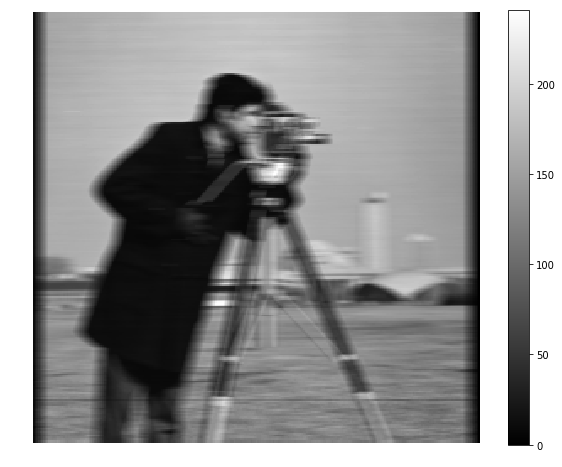

In [8]:
p=10
y1=np.ones(p)/p
(N1,N2)=img.shape
img_neu=np.zeros([N1,N2+p-1])
for i in range(0,N1):
    img_neu[i,:]=conv1d(img[i,:],y1)

plt.imshow(img_neu)
plt.colorbar()
plt.set_cmap('gray')
plt.axis('off');

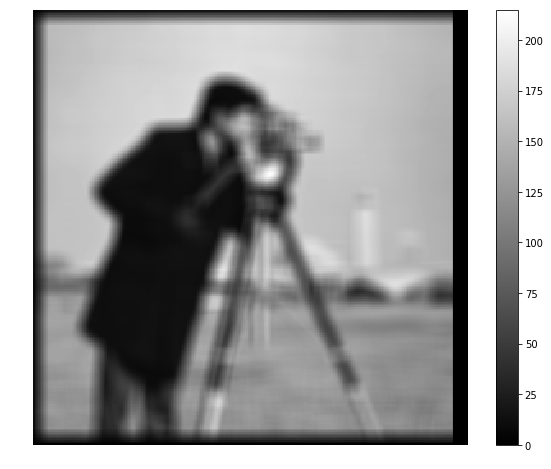

In [9]:
p=10
y1=np.ones(p)/p
(N1,N2)=img.shape
img_neu2=np.zeros([N1+p-1,N2+p-1])
for i in range(0,N1):
    img_neu2[:,i]=conv1d(img_neu[:,i],y1)

plt.imshow(img_neu2)
plt.colorbar()
plt.set_cmap('gray')
plt.axis('off');

Nun mit dem Kantendetektor.

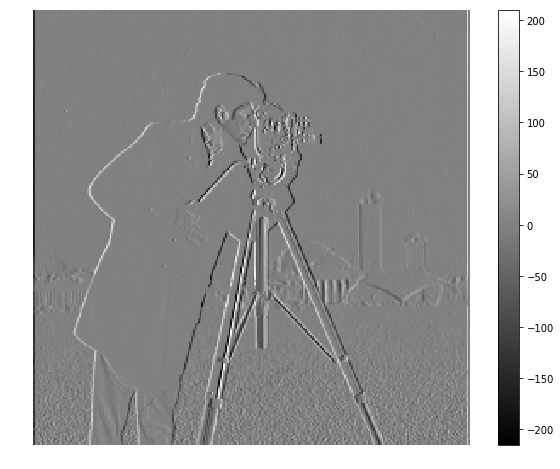

In [7]:
p=2
y1=np.ones(p)
y1[0]=-1
(N1,N2)=img.shape
img_neu=np.zeros([N1,N2+p-1])
for i in range(0,N1):
    img_neu[i,:]=conv1d(img[i,:],y1)

plt.imshow(img_neu)
plt.colorbar()
plt.set_cmap('gray')
plt.axis('off');